In [1]:
!pip install ctgan
!pip install sdv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.5/70.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.1/130.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.3/160.3 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: Faker
    Found existing installation: Faker 19.11.0
    Uninstalling Faker-19.11.0:
      Successfully uninstalled Faker-19.11.0


In [2]:
from ctgan import CTGAN

import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import time

# record start time
start = time.time()
le = LabelEncoder()

df = pd.read_csv('https://raw.githubusercontent.com/mahayasa/various-sampling-churn-prediction/main/data/telco_churn.csv')

df['Churn']=le.fit_transform(df['Churn'])
#transform data into numeric value
df1=df[df['Churn']==0]
df=df[df['Churn']==1]
df['Partner']=le.fit_transform(df['Partner'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['PhoneService']=le.fit_transform(df['PhoneService'])
df['MultipleLines']=le.fit_transform(df['MultipleLines'])
df['InternetService']=le.fit_transform(df['InternetService'])
df['OnlineSecurity']=le.fit_transform(df['OnlineSecurity'])
df['DeviceProtection']=le.fit_transform(df['DeviceProtection'])
df['TechSupport']=le.fit_transform(df['TechSupport'])
df['StreamingTV']=le.fit_transform(df['StreamingTV'])
df['StreamingMovies']=le.fit_transform(df['StreamingMovies'])
df['Contract']=le.fit_transform(df['Contract'])
df['PaperlessBilling']=le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod']=le.fit_transform(df['PaymentMethod'])
df['gender']=le.fit_transform(df['gender'])
df['OnlineBackup']=le.fit_transform(df['OnlineBackup'])

#filling missing value with mean
df['TotalCharges'].replace(to_replace = 0, value = df['TotalCharges'].mean(), inplace=True)
df=df.drop(['customerID'],axis=1)

df1['Partner']=le.fit_transform(df1['Partner'])
df1['Dependents']=le.fit_transform(df1['Dependents'])
df1['PhoneService']=le.fit_transform(df1['PhoneService'])
df1['MultipleLines']=le.fit_transform(df1['MultipleLines'])
df1['InternetService']=le.fit_transform(df1['InternetService'])
df1['OnlineSecurity']=le.fit_transform(df1['OnlineSecurity'])
df1['DeviceProtection']=le.fit_transform(df1['DeviceProtection'])
df1['TechSupport']=le.fit_transform(df1['TechSupport'])
df1['StreamingTV']=le.fit_transform(df1['StreamingTV'])
df1['StreamingMovies']=le.fit_transform(df1['StreamingMovies'])
df1['Contract']=le.fit_transform(df1['Contract'])
df1['PaperlessBilling']=le.fit_transform(df1['PaperlessBilling'])
df1['PaymentMethod']=le.fit_transform(df1['PaymentMethod'])
df1['gender']=le.fit_transform(df1['gender'])
df1['OnlineBackup']=le.fit_transform(df1['OnlineBackup'])

#filling missing value with mean
df1['TotalCharges'].replace(to_replace = 0, value = df1['TotalCharges'].mean(), inplace=True)
df1=df1.drop(['customerID'],axis=1)


batch_size = 5000
epochs = 100
model = CTGAN(batch_size=batch_size, epochs=epochs, verbose=True)
model.fit(df)

end = time.time()



print("The time of execution of preprocess:",
      (end-start), "s")

Gen. (-0.95) | Discrim. (-0.07): 100%|██████████| 100/100 [01:05<00:00,  1.52it/s]

The time of execution of preprocess: 85.25377464294434 s


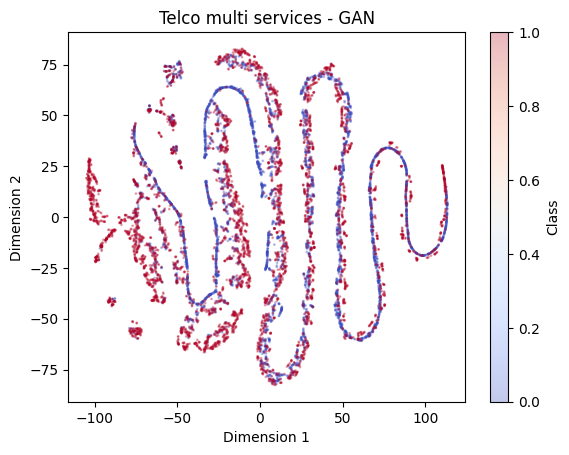

In [3]:
n_generated_data = 3305
generated_df = model.sample(n_generated_data)

#concat original data and gan data
data_concat = pd.concat([df, generated_df])
# combine data churn and not churn
data=pd.concat([df1, data_concat])

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

features = data.drop(['Churn'], axis=1)
labels = data['Churn']

 #Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
embedded_features = tsne.fit_transform(features)

# Plotting the embedded features
plt.scatter(embedded_features[:, 0], embedded_features[:, 1], c=labels, cmap='coolwarm',s=1,alpha=0.3)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Telco multi services - GAN')
plt.colorbar(label='Class')
plt.show()

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jun  1 17:31:40 2020

@author: manav

Modifed on 23 AUG 2022

by mahayasa adiputra
"""

import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
import sklearn.metrics as mt
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import NeighbourhoodCleaningRule
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from numpy import mean
from numpy import std
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
from imblearn.metrics import specificity_score
from sklearn.ensemble import RandomForestClassifier
import math
import time

startu=time.time()


X=data.drop(['Churn'],axis=1)
y=data["Churn"]


enn = EditedNearestNeighbours(n_neighbors=3)
X, y = enn.fit_resample(X, y)
#ncr = NeighbourhoodCleaningRule(n_neighbors=5, kind_sel='all')
#X, y = ncr.fit_resample(X, y)
#tomek_links = TomekLinks()
#X, y = tomek_links.fit_resample(X, y)
cv = KFold(n_splits=5, random_state=1, shuffle=True)

endu=time.time()
print("The time of execution of preprocess undersampling:",
      (endu-startu), "s")


The time of execution of preprocess undersampling: 0.6667273044586182 s


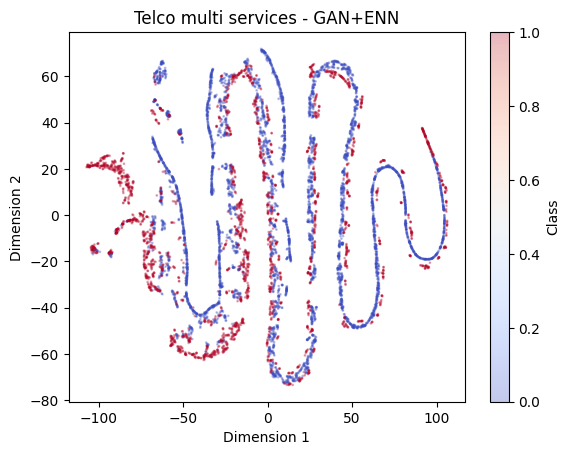

In [6]:
#import matplotlib.pyplot as plt
#from sklearn.manifold import TSNE

features = X
labels =y

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
embedded_features = tsne.fit_transform(features)

# Plotting the embedded features
plt.scatter(embedded_features[:, 0], embedded_features[:, 1], c=labels, cmap='coolwarm',s=1,alpha=0.3)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Telco multi services - GAN+ENN')
plt.colorbar(label='Class')
plt.show()

In [ ]:
data = pd.concat([X, y], axis=1)

In [ ]:
#fisher discriminant ratio
def fishers_discriminant_ratio(feature):
    class1_data=data[data['Churn']==0][feature]
    class2_data=data[data['Churn']==1][feature]
    mean1 = sum(class1_data) / len(class1_data)
    mean2 = sum(class2_data) / len(class2_data)

    variance1 = sum((x - mean1) ** 2 for x in class1_data) / len(class1_data)
    variance2 = sum((x - mean2) ** 2 for x in class2_data) / len(class2_data)

    between_variance = len(class1_data) * (mean1 - mean2) ** 2
    within_variance = variance1 + variance2

    discriminant_ratio = between_variance / within_variance
    return discriminant_ratio

In [ ]:
exclude_feature = 'Churn'
for feature in data.columns:
    if feature != exclude_feature:
        discriminant_ratio = fishers_discriminant_ratio(feature)
        print(f"Discriminant Ratio for {feature}: {discriminant_ratio}")

Discriminant Ratio for gender: 458.3589964887209
Discriminant Ratio for SeniorCitizen: 284.494502904665
Discriminant Ratio for Partner: 1138.8128680982468
Discriminant Ratio for Dependents: 760.5876014781701
Discriminant Ratio for tenure: 5723.785003457896
Discriminant Ratio for PhoneService: 301.48439866737715
Discriminant Ratio for MultipleLines: 157.48011263425596
Discriminant Ratio for InternetService: 0.10801592035112526
Discriminant Ratio for OnlineSecurity: 2848.742842483768
Discriminant Ratio for OnlineBackup: 1755.3009169482948
Discriminant Ratio for DeviceProtection: 1772.088457196373
Discriminant Ratio for TechSupport: 294.8219656497564
Discriminant Ratio for StreamingTV: 199.98486223228934
Discriminant Ratio for StreamingMovies: 144.90512320611845
Discriminant Ratio for Contract: 3913.2845828269037
Discriminant Ratio for PaperlessBilling: 55.865750255595735
Discriminant Ratio for PaymentMethod: 142.3672880887016
Discriminant Ratio for MonthlyCharges: 171.3687243259696
Discr

In [ ]:

start2 = time.time()
classifier=KNeighborsClassifier()
score=cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('===============KNN Performance====================')

print('F1 score: %.3f' % (mean(score)))
print('STD F1 Score: %.3f' % (std(score)))

rc=cross_val_score(classifier, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Recall: %.3f' % (mean(rc)))


# Define the specificity scorer
scorer = make_scorer(specificity_score)

# Calculate the cross-validated specificity score
sp = cross_val_score(classifier, X, y, cv=5, scoring=scorer)
print('Specitifity: %.3f' % (mean(sp)))

auc=cross_val_score(classifier, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC ROC: %.3f' % (mean(auc)))

gmean=rc*sp
gmean=mean(gmean)
sqrtg = math.sqrt(gmean)
print('G-Mean: %.3f' % (sqrtg))
print('======================================================')

end2 = time.time()
print("The time of execution of knn:",
      (end2-start2), "s")

===============KNN Performance====================
F1 score: 0.907
STD F1 Score: 0.010
Recall: 0.873
Specitifity: 0.975
AUC ROC: 0.980
G-Mean: 0.922
The time of execution of knn: 4.895806312561035 s


In [ ]:

start4 = time.time()
classifier=DecisionTreeClassifier()
score=cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('===============DT Performance====================')

print('F1 score: %.3f' % (mean(score)))
print('STD F1 Score: %.3f' % (std(score)))

rc=cross_val_score(classifier, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Recall: %.3f' % (mean(rc)))


# Define the specificity scorer
scorer = make_scorer(specificity_score)

# Calculate the cross-validated specificity score
sp = cross_val_score(classifier, X, y, cv=5, scoring=scorer)
print('Specitifity: %.3f' % (mean(sp)))

auc=cross_val_score(classifier, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC ROC: %.3f' % (mean(auc)))

gmean=rc*sp
gmean=mean(gmean)
sqrtg = math.sqrt(gmean)
print('G-Mean: %.3f' % (sqrtg))
print('======================================================')

end4 = time.time()
print("The time of execution of dt:",
      (end4-start4), "s")

===============DT Performance====================
F1 score: 0.928
STD F1 Score: 0.007
Recall: 0.921
Specitifity: 0.967
AUC ROC: 0.944
G-Mean: 0.944
The time of execution of dt: 1.3344731330871582 s


In [ ]:
start5 = time.time()
classifier=GaussianNB()
score=cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('===============NB Performance====================')

print('F1 score: %.3f' % (mean(score)))
print('STD F1 Score: %.3f' % (std(score)))

rc=cross_val_score(classifier, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Recall: %.3f' % (mean(rc)))


# Define the specificity scorer
scorer = make_scorer(specificity_score)

# Calculate the cross-validated specificity score
sp = cross_val_score(classifier, X, y, cv=5, scoring=scorer)
print('Specitifity: %.3f' % (mean(sp)))

auc=cross_val_score(classifier, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC ROC: %.3f' % (mean(auc)))

gmean=rc*sp
gmean=mean(gmean)
sqrtg = math.sqrt(gmean)
print('G-Mean: %.3f' % (sqrtg))
print('======================================================')

end5 = time.time()
print("The time of execution of NB:",
      (end5-start5), "s")

===============NB Performance====================
F1 score: 0.789
STD F1 Score: 0.008
Recall: 0.872
Specitifity: 0.816
AUC ROC: 0.910
G-Mean: 0.843
The time of execution of NB: 0.5674004554748535 s


In [ ]:
start3=time.time()

classifier = GradientBoostingClassifier()

score=cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('===============GBM Performance====================')

print('F1 score: %.3f' % (mean(score)))
print('STD F1 Score: %.3f' % (std(score)))

rc=cross_val_score(classifier, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Recall: %.3f' % (mean(rc)))


# Define the specificity scorer
scorer = make_scorer(specificity_score)

# Calculate the cross-validated specificity score
sp = cross_val_score(classifier, X, y, cv=5, scoring=scorer)
print('Specitifity: %.3f' % (mean(sp)))

auc=cross_val_score(classifier, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC ROC: %.3f' % (mean(auc)))


gmean=rc*sp
gmean=mean(gmean)
sqrtg = math.sqrt(gmean)
print('G-Mean: %.3f' % (sqrtg))
print('======================================================')

end3 = time.time()
print("The time of execution of gbm:",
      (end3-start3), "s")


===============GBM Performance====================
F1 score: 0.933
STD F1 Score: 0.004
Recall: 0.915
Specitifity: 0.974
AUC ROC: 0.991
G-Mean: 0.944
The time of execution of gbm: 23.887239456176758 s


In [ ]:

# record start time
start1 = time.time()
#kfold cross validation



#Training XGBoost
#classifier = XGBClassifier(eta=0.3, max_depth = 4, gamma=0, min_child_weight=1)
classifier = XGBClassifier()

score=cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('===============XGBoost Performance====================')

print('F1 score: %.3f' % (mean(score)))
print('STD F1 Score: %.3f' % (std(score)))

rc=cross_val_score(classifier, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Recall: %.3f' % (mean(rc)))


# Define the specificity scorer
scorer = make_scorer(specificity_score)

# Calculate the cross-validated specificity score
sp = cross_val_score(classifier, X, y, cv=5, scoring=scorer)
print('Specitifity: %.3f' % (mean(sp)))

auc=cross_val_score(classifier, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC ROC: %.3f' % (mean(auc)))


gmean=rc*sp
gmean=mean(gmean)
sqrtg = math.sqrt(gmean)
print('G-Mean: %.3f' % (sqrtg))
print('======================================================')

end1 = time.time()

print("The time of execution of XGBOOST:",
      (end1-start1), "s")

===============XGBoost Performance====================
F1 score: 0.949
STD F1 Score: 0.006
Recall: 0.940
Specitifity: 0.981
AUC ROC: 0.995
G-Mean: 0.960
The time of execution of XGBOOST: 23.004491806030273 s


In [ ]:
# record start time
start2 = time.time()

classifier = RandomForestClassifier()

score=cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('===============Random Forest Performance====================')

print('F1 score: %.3f' % (mean(score)))
print('STD F1 Score: %.3f' % (std(score)))

rc=cross_val_score(classifier, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Recall: %.3f' % (mean(rc)))


# Define the specificity scorer
scorer = make_scorer(specificity_score)

# Calculate the cross-validated specificity score
sp = cross_val_score(classifier, X, y, cv=5, scoring=scorer)
print('Specitifity: %.3f' % (mean(sp)))

auc=cross_val_score(classifier, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC ROC: %.3f' % (mean(auc)))

gmean=rc*sp
gmean=mean(gmean)
sqrtg = math.sqrt(gmean)
print('G-Mean: %.3f' % (sqrtg))
print('======================================================')

end2 = time.time()

print("The time of execution of Random Forest:",
      (end2-start2), "s")

===============Random Forest Performance====================
F1 score: 0.942
STD F1 Score: 0.007
Recall: 0.935
Specitifity: 0.975
AUC ROC: 0.992
G-Mean: 0.955
The time of execution of Random Forest: 14.282027006149292 s


In [ ]:
# record start time
start3 = time.time()
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(n_estimators=100,learning_rate=0.1,algorithm='SAMME.R')

score=cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('===============ADABoost Performance====================')

print('F1 score: %.3f' % (mean(score)))
print('STD F1 Score: %.3f' % (std(score)))

rc=cross_val_score(classifier, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Recall: %.3f' % (mean(rc)))


# Define the specificity scorer
scorer = make_scorer(specificity_score)

# Calculate the cross-validated specificity score
sp = cross_val_score(classifier, X, y, cv=5, scoring=scorer)
print('Specitifity: %.3f' % (mean(sp)))

auc=cross_val_score(classifier, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC ROC: %.3f' % (mean(auc)))


gmean=rc*sp
gmean=mean(gmean)
sqrtg = math.sqrt(gmean)
print('G-Mean: %.3f' % (sqrtg))
print('======================================================')
end3 = time.time()

print("The time of execution of ADABOOST:",
      (end3-start3), "s")

===============ADABoost Performance====================
F1 score: 0.825
STD F1 Score: 0.008
Recall: 0.825
Specitifity: 0.849
AUC ROC: 0.925
G-Mean: 0.837
The time of execution of ADABOOST: 16.633259057998657 s
